In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [23]:
# import data,data have been collected from different sources and  put in a single file 
data=pd.read_csv('FTSE.csv',index_col=0,parse_dates=True,na_values=["",".","0","null"])
data.head(3)

,FTSE 100,OILB,OILT,GBP/EURO,GBP/CNY,GOLD,SONIA,GBP/USD,3LIBOR,6LIBOR
Date,,,,,,,,,,
2009-01-02,4561.8,29.611424,31.838832,1.0407,9.8940,599.7796,1.5620,1.4502,2.7050,2.90
2009-01-05,4579.6,31.469160,33.370765,1.0684,9.9493,590.3900,1.5835,1.4567,2.6475,2.85
2009-01-06,4638.9,33.289201,33.064504,1.0979,10.0393,574.6796,1.5881,1.4686,2.6138,2.82


In [24]:
#first step check correlation between FTSE100 and inputs and remove inputs with weak correlation
corr=data.corr()
corr

,FTSE 100,OILB,OILT,GBP/EURO,GBP/CNY,GOLD,SONIA,GBP/USD,3LIBOR,6LIBOR
FTSE 100,1.000000,-0.018939,-0.039593,0.022195,-0.749888,0.470151,-0.156594,-0.576271,-0.604602,-0.698530
OILB,-0.018939,1.000000,0.965134,-0.232656,0.283127,0.367791,0.086369,0.434863,0.016506,0.068158
OILT,-0.039593,0.965134,1.000000,-0.273274,0.339481,0.243139,0.031441,0.463078,-0.017393,0.036701
GBP/EURO,0.022195,-0.232656,-0.273274,1.000000,0.107319,-0.250482,-0.149109,0.330335,-0.232358,-0.208115
GBP/CNY,-0.749888,0.283127,0.339481,0.107319,1.000000,-0.553764,0.055728,0.890155,0.262119,0.377552
GOLD,0.470151,0.367791,0.243139,-0.250482,-0.553764,1.000000,0.049545,-0.477219,-0.174608,-0.179125
SONIA,-0.156594,0.086369,0.031441,-0.149109,0.055728,0.049545,1.000000,-0.050722,0.686952,0.608111
GBP/USD,-0.576271,0.434863,0.463078,0.330335,0.890155,-0.477219,-0.050722,1.000000,0.102088,0.198267
3LIBOR,-0.604602,0.016506,-0.017393,-0.232358,0.262119,-0.174608,0.686952,0.102088,1.000000,0.976496
6LIBOR,-0.698530,0.068158,0.036701,-0.208115,0.377552,-0.179125,0.608111,0.198267,0.976496,1.000000


In [25]:
# sort correlation
corr['FTSE 100'].sort_values(ascending=False)

FTSE 100    1.000000
GOLD        0.470151
GBP/EURO    0.022195
OILB       -0.018939
OILT       -0.039593
SONIA      -0.156594
GBP/USD    -0.576271
3LIBOR     -0.604602
6LIBOR     -0.698530
GBP/CNY    -0.749888
Name: FTSE 100, dtype: float64

In [26]:
# removing inputs with weak correlation
data.drop(['GBP/EURO','OILT','OILB','SONIA'],axis=1,inplace=True)
data

,FTSE 100,GBP/CNY,GOLD,GBP/USD,3LIBOR,6LIBOR
Date,,,,,,
2009-01-02,4561.80,9.8940,599.779600,1.4502,2.7050,2.90
2009-01-05,4579.60,9.9493,590.390000,1.4567,2.6475,2.85
2009-01-06,4638.90,10.0393,574.679600,1.4686,2.6138,2.82
2009-01-07,4507.50,10.3595,569.894400,1.5161,2.5688,2.77
2009-01-08,4505.40,10.3887,554.280750,1.5201,2.5025,2.71
...,...,...,...,...,...,...
2019-12-23,7623.59,9.0642,1147.983720,1.2926,0.7996,0.88
2019-12-24,7632.24,9.0714,1151.383455,1.2948,0.7976,0.88
2019-12-26,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# removing missing data 
data.dropna(inplace=True)

In [28]:
# categorize FTSE 100 into two category , 0 for downward trend and 1 for upward trend,using MACD indicator for categorizing 
mean_12=data['FTSE 100'].rolling(window=12).mean()
mean_26=data['FTSE 100'].rolling(window=26).mean()
mean_12=mean_12.iloc[27:]
mean_26=mean_26.iloc[27:]
data=data.iloc[27:,:]
data['target']=0
for i in range(len(mean_12)):
    if mean_12.iloc[i]<mean_26.iloc[i]:
        data['target'][i]=0
    else:
        data['target'][i]=1
        

C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

In [29]:
# removing FTSE100 price,we don't need it anymore
data=data.iloc[:,1:]
data.head(3)

,GBP/CNY,GOLD,GBP/USD,3LIBOR,6LIBOR,target
Date,,,,,,
2009-02-11,9.8070,642.4496,1.4352,2.0819,2.25,0
2009-02-12,9.7378,662.5936,1.4248,2.0700,2.24,0
2009-02-13,9.8717,650.7124,1.4434,2.0669,2.23,0


In [30]:
# define the X and y , there are 5 inputs and 1 output
X=data.iloc[:,:5].values
y=data.iloc[:,5].values

In [31]:
# standardize the input 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [32]:
# prepare data for feeding to cnn , use time step to creat 3 dimensional matrix
time_steps= 7
X_new= np.zeros((X.shape[0] - time_steps +1, 7, X.shape[1]))
y_new= np.zeros((y.shape[0] -time_steps +1,))
for ix in range(X_new.shape[0]):
    for jx in range(time_steps):
        X_new[ix, jx, :]= X[ix +jx, :]
    y_new[ix]= y[ix + time_steps -1]
print(X_new.shape, y_new.shape)

(2682, 7, 5) (2682,)


In [33]:
# split data into 80% train and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2,random_state=42)

# convolutional neural network

In [34]:
tf.random.set_seed(42)

In [35]:
# based on the vanila neural network that I build I just add one layer convolutional and pooling layer to vanila neural network to see
# whether the accuracy will improve or not,use hyperparameter tuning for filter and kernel size
def cnn_model(filters=10,kernel_size=7):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size,activation='relu',input_shape=(7, 5)))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(60,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=["accuracy"])
    return model   

In [36]:
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=cnn_model,epochs=500,verbose=0)
from sklearn.model_selection import GridSearchCV
filters=[32,64]
kernel_size=[3,5,7]
param_grid = dict(filters=filters,kernel_size=kernel_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1619, in _create_c_op
    c_op = c_api.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 2 from 1 for 'max_pooling1d_26/MaxPool' (op: 'MaxPool') with input shapes: [?,1,1,32].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sahar\anaconda3\envs\tensorflow_env\

In [37]:
grid_result.best_params_

{'filters': 64, 'kernel_size': 3}

In [38]:
grid_result.best_score_

0.8060606122016907

In [39]:
#build model based on the best hyperparameter we get
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(filters=grid_result.best_params_['filters'], kernel_size=grid_result.best_params_['kernel_size'],activation='relu',padding='same',input_shape=(7, 5)))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(60,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=["accuracy"])

In [40]:
history=model.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=1000,verbose=0)

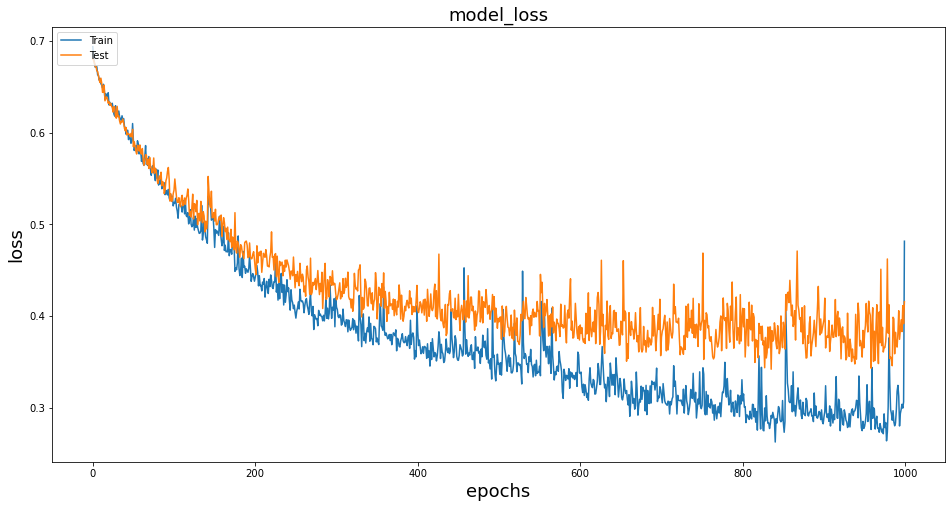

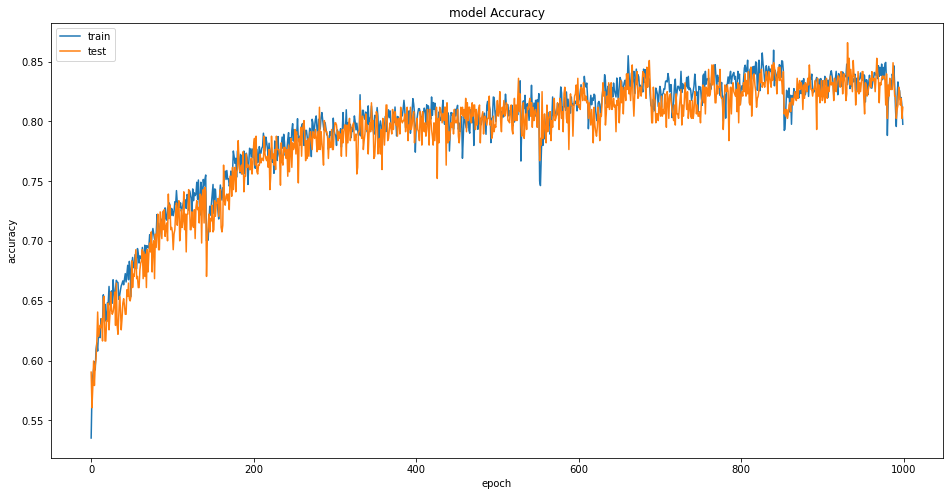

In [41]:
def plot_loss_acc():
    plt.figure(figsize=(16,8))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs',fontsize=18)
    plt.ylabel('loss',fontsize=18)
    plt.title('model_loss',fontsize=18)
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    plt.figure(figsize=(16,8))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show() 
plot_loss_acc()

In [42]:
from sklearn.metrics import classification_report
y_pred=model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80       241
         1.0       0.87      0.77      0.82       296

    accuracy                           0.81       537
   macro avg       0.81      0.82      0.81       537
weighted avg       0.82      0.81      0.81       537

